<div style="text-align: right"> __Provided on May 14, Due on May 27__ [BRI516, Spring/2019] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python 3.5 
* Please upload your jupyter-notebook file for homework to `Blackboard`
* Please visualize the results as much as possible and discuss your results at least one line of text

### [HW04]

#### Clustering Analysis (CH. 11)

##### (1) Data preparation
    Generate four isotropic Gaussian blobs with 400 2D samples and with cluster standard deviation of 0.5




### * Generate isotropic Gaussian blobs for clustering.

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

# Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
#help(make_blobs)

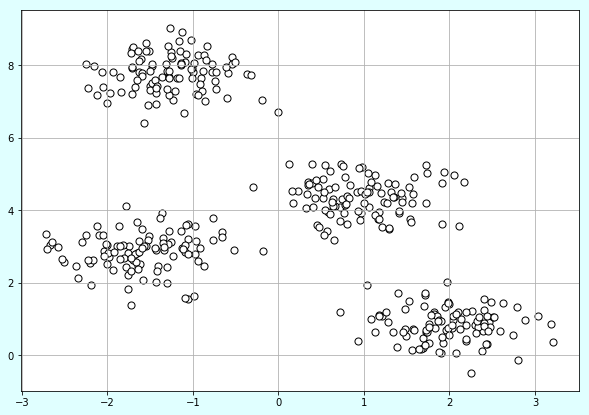

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('lightcyan')
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

##### (2) k-means
    (2a) Implement the k-means algorithm using generic python code (i.e., not using the scikit-learn)



In [4]:
from copy import deepcopy

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

[[0. 5.]
 [1. 3.]
 [2. 5.]
 [0. 1.]]


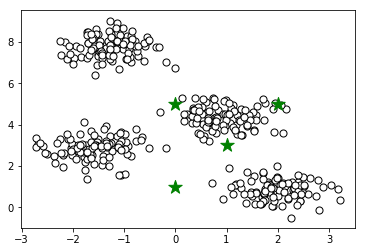

In [5]:
# Number of clusters
k = 4

## 1. Randomly pick k centroids from the sample points as initial cluster centers.
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-3, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-3, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

# Plotting along with the Centroids
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

    (2b) Implement the `k-means++` initialization method

    (2c) Run your k-means algorithm implementation using the blob dataset from (1) in the following conditions. Choose the reasonable number of runs and maximum iterations from a trial and error. 

    (2c-1) Choose an optimal number of clusters between 1 and 10 based on both the elbow method and silhouette method

In [6]:
# import silhouette plots
from matplotlib import cm
from sklearn.metrics import silhouette_samples

    (2c-2) Set the optimal number of cluseters found from (2c-1) and compare the results of clustering analysis 

    (2c-3) Compare the results of your implementation and results of the scikit-learn implementation for both (2c-1) and (2c-2)

### * results of the scikit-learn implementation

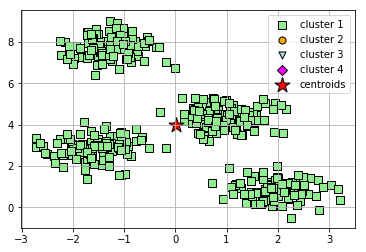

In [7]:
# the scikit-learn implementation
from sklearn.cluster import KMeans

km = KMeans(n_clusters=1, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s',edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='magenta', marker='D', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend()
plt.grid()
plt.show()

In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 3646.33


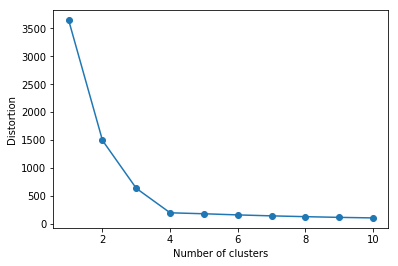

In [9]:
# elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

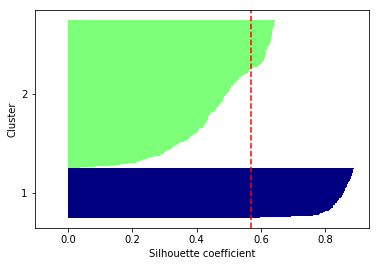

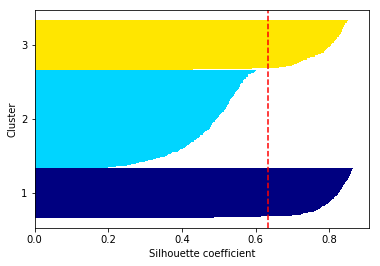

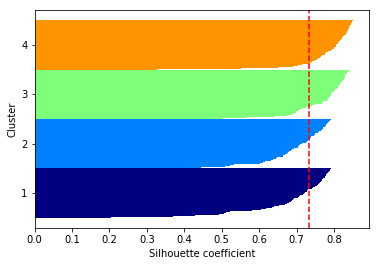

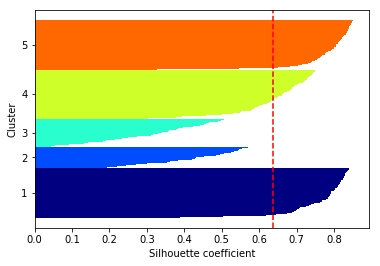

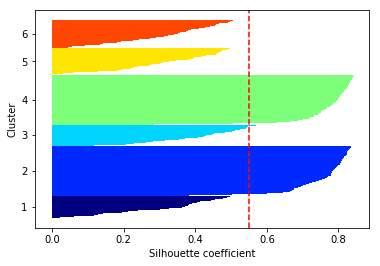

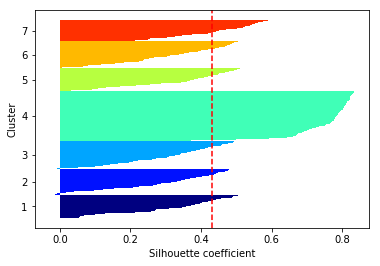

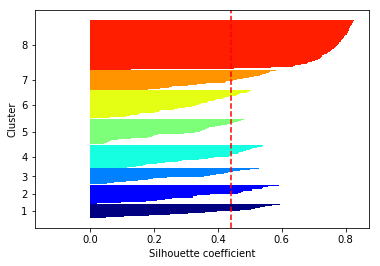

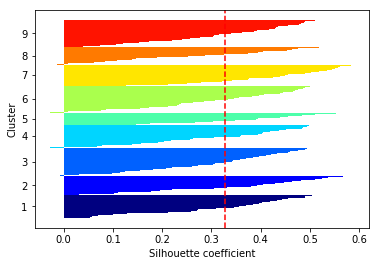

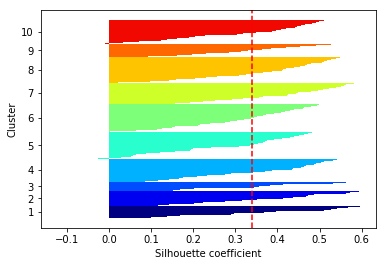

In [10]:
# silhouette method
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

##### (3) Fuzzy C-means (FCM)
    (3a) Implement the FCM using generic python code

    (3b) Let's suppose the fuzziness coefficient, m = 2. Choose the proper number of clusters between 1 and 10 based on the elbow method 

    (3c) Discuss the obtained results with the results from (2c-1)